In [57]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
# Import dataset

df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Check type of variables

df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
# Change variable type of 'gender'

genders = {"Female" : 1, "Male" : 0}
df['gender_binary'] = df['gender'].map(genders)
df.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_binary
0,Female,80.0,0,1,never,25.19,6.6,140,0,1.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.0


In [13]:
# Change variable type of 'smoking_history'

df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [42]:
smoking_cat = {'No Info' : 0, 'never' : 1, 'former' : 2, 'current' : 3, 'ever' : 4, 'not current' : 5}
df['smoking_history_binary'] = df['smoking_history'].map(smoking_cat)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_binary,smoking_history-binary,smoking_history_binary
0,Female,80.0,0,1,never,25.19,6.6,140,0,1.0,1,1
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0,1,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,1.0,3,3
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.0,3,3


In [63]:
# Check for missing value and remove them

print(df.isna().sum())
df = df.dropna()

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
gender_binary             18
smoking_history-binary     0
smoking_history_binary     0
dtype: int64


## Descriptive analysis

In [16]:
df.shape

(100000, 11)

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'gender_binary', 'smoking_history-binary'],
      dtype='object')

In [19]:
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

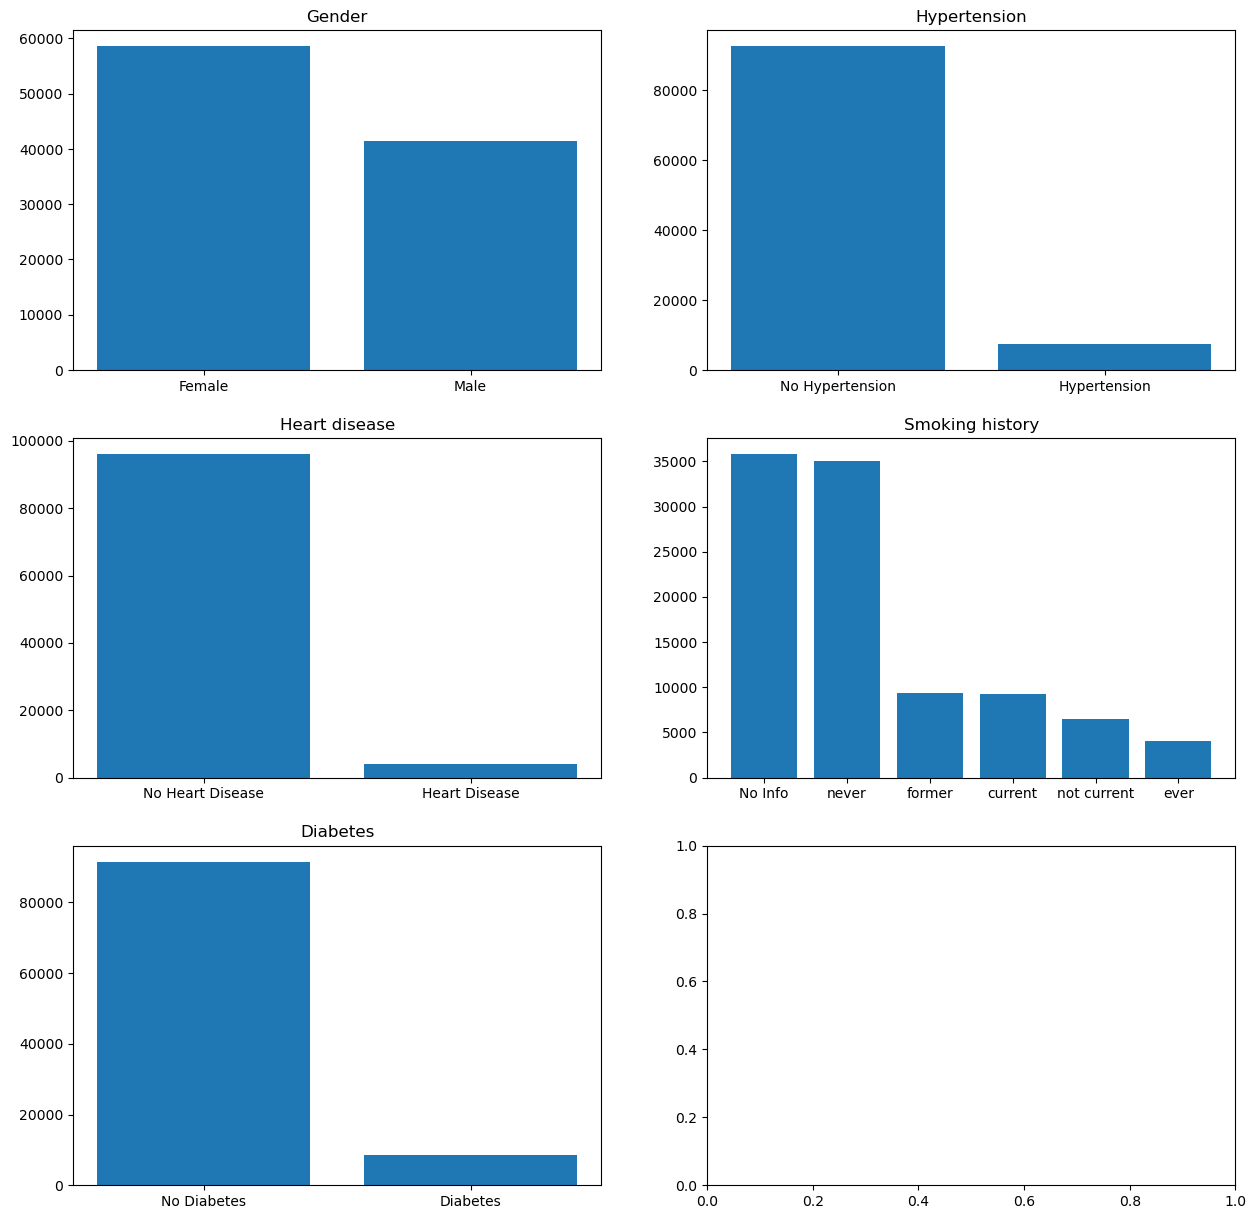

In [64]:
# Frequency of catogorical variables

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].bar(df['gender'].value_counts().index, df['gender'].value_counts().values)
axs[0, 0].set_title('Gender')
axs[0, 0].set_xticks(df['gender'].value_counts().index)


axs[0, 1].bar(df['hypertension'].value_counts().index, df['hypertension'].value_counts().values)
axs[0, 1].set_title('Hypertension')
axs[0, 1].set_xticks(df['hypertension'].value_counts().index)
axs[0, 1].set_xticklabels(['No Hypertension', 'Hypertension'])

axs[1, 0].bar(df['heart_disease'].value_counts().index, df['heart_disease'].value_counts().values)
axs[1, 0].set_title('Heart disease')
axs[1, 0].set_xticks(df['heart_disease'].value_counts().index)
axs[1, 0].set_xticklabels(['No Heart Disease', 'Heart Disease'])

axs[1, 1].bar(df['smoking_history'].value_counts().index, df['smoking_history'].value_counts().values)
axs[1, 1].set_title('Smoking history')
axs[1, 1].set_xticks(df['smoking_history'].value_counts().index)

axs[2, 0].bar(df['diabetes'].value_counts().index, df['diabetes'].value_counts().values)
axs[2, 0].set_title('Diabetes')
axs[2, 0].set_xticks(df['diabetes'].value_counts().index)
axs[2, 0].set_xticklabels(['No Diabetes', 'Diabetes'])





Text(0.5, 1.0, 'Blood glucose level')

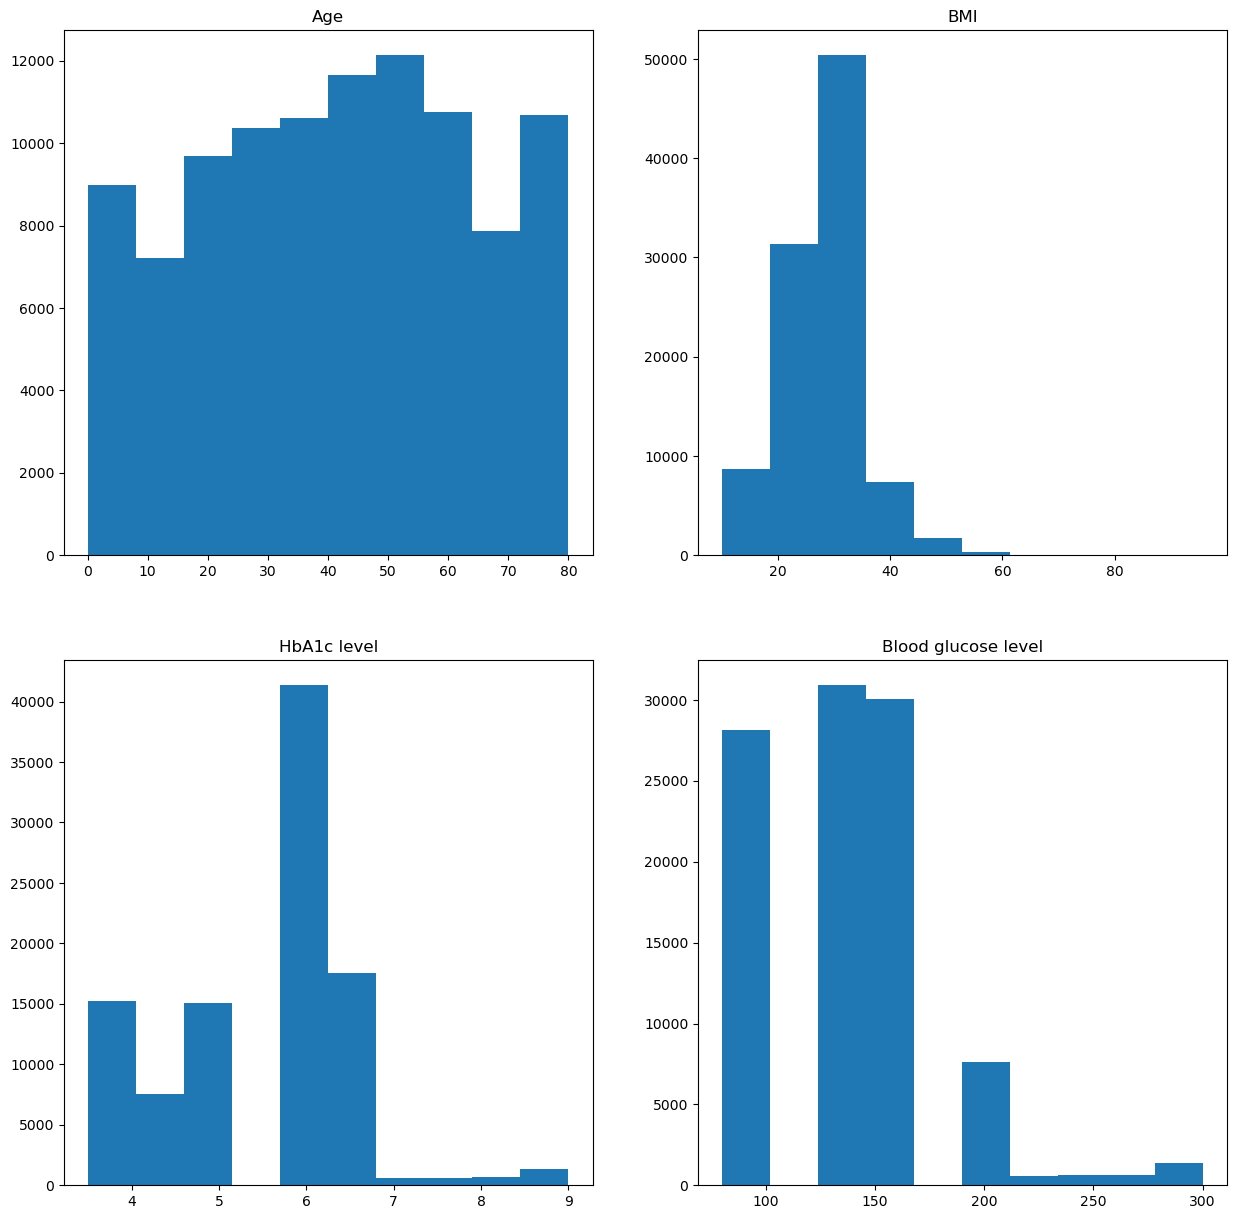

In [36]:
# Histogram of continuous variables

fig, axs = plt.subplots(2,2, figsize=(15, 15))

axs[0,0].hist(df['age'])
axs[0,0].set_title('Age')

axs[0,1].hist(df['bmi'])
axs[0,1].set_title('BMI')

axs[1,0].hist(df['HbA1c_level'])
axs[1,0].set_title('HbA1c level')

axs[1,1].hist(df['blood_glucose_level'])
axs[1,1].set_title('Blood glucose level')


In [38]:
# Correlation matrix

df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].corr()

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.337396,0.101354,0.110672
bmi,0.337396,1.000000,0.082997,0.091261
HbA1c_level,0.101354,0.082997,1.000000,0.166733
blood_glucose_level,0.110672,0.091261,0.166733,1.000000


## Neural network 

In [116]:
X = df[['gender_binary', 'age', 'hypertension', 'heart_disease', 'smoking_history_binary', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']
from imblearn.over_sampling import SMOTE
# Split into train and test sets and scale it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
# Define the neural network
model = Sequential([
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation="sigmoid")  # For regression; use 'sigmoid' or 'softmax' for classification
])
# Compile the model
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])


# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 3s 651us/step - accuracy: 0.8421 - loss: 0.1067 - val_accuracy: 0.8377 - val_loss: 0.1103
Epoch 2/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - accuracy: 0.8828 - loss: 0.0806 - val_accuracy: 0.8619 - val_loss: 0.0981
Epoch 3/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 669us/step - accuracy: 0.8839 - loss: 0.0795 - val_accuracy: 0.9091 - val_loss: 0.0717
Epoch 4/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 601us/step - accuracy: 0.8839 - loss: 0.0793 - val_accuracy: 0.8418 - val_loss: 0.1035
Epoch 5/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 661us/step - accuracy: 0.8846 - loss: 0.0788 - val_accuracy: 0.9022 - val_loss: 0.0757
Epoch 6/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 632us/step - accuracy: 0.8853 - loss: 0.0781 - val_accuracy: 0.8775 - val_loss: 0.0848
Epoch 7/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 650us/step - accuracy: 0.8838 - loss: 0.0789 - val_accuracy: 0.7878 - val_loss: 0.1367
Epoch 8/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step - accuracy: 0.8861 -

In [122]:
# Model evaluation

test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f"Test Accuracy: {test_accuracy}")

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step - accuracy: 0.9035 - loss: 0.0599
Test Accuracy: 0.9059323668479919


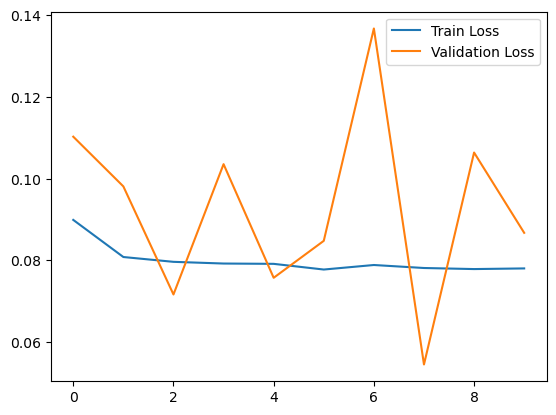

In [120]:
# Loss plot

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [118]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) 
print(classification_report(y_test, y_pred))

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     18222
           1       0.49      0.86      0.62      1775

    accuracy                           0.91     19997
   macro avg       0.74      0.89      0.79     19997
weighted avg       0.94      0.91      0.92     19997

